In [2]:
from osgeo import gdal
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np



In [12]:

# Open your dataset
dataset = gdal.Open("G:\\My Drive\\one_hei_in_ruh.tif")
#dataset = gdal.Open('G:\\My Drive\\alsamer_new_22.tif')

c:\Users\Musae\AppData\Local\Programs\Python\Python311\Lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


In [14]:


dataset = gdal.Open("G:\\My Drive\\RUH_all_bands\\RUH-All-Bands_2018-12-15.tif")

# Read the bands - assuming the bands are 4, 3, 2 for RGB
red = dataset.GetRasterBand(4).ReadAsArray().astype(float)
green = dataset.GetRasterBand(3).ReadAsArray().astype(float)
blue = dataset.GetRasterBand(2).ReadAsArray().astype(float)

# Replace any potential NaN ort infinite values with zeros
red[np.isnan(red) | np.isinf(red)] = 0
green[np.isnan(green) | np.isinf(green)] = 0
blue[np.isnan(blue) | np.isinf(blue)] = 0

# Normalize the bands
def normalize(array):
    array_min, array_max = array.min(), array.max()
    # Avoid division by zero
    return (array - array_min) / (array_max - array_min) if array_max - array_min > 0 else array

red_normalized = normalize(red)
green_normalized = normalize(green)
blue_normalized = normalize(blue)

# Convert the normalized arrays to 8-bit (0-255)
red_8bit = (red_normalized * 255).astype(np.uint8)
green_8bit = (green_normalized * 255).astype(np.uint8)
blue_8bit = (blue_normalized * 255).astype(np.uint8)

# Stack the bands along the third dimension to create an RGB image
rgb_8bit = np.stack((red_8bit, green_8bit, blue_8bit), axis=2)

# Create a PIL image from the numpy array
image = Image.fromarray(rgb_8bit)

# Save the image to a file
image.save("G:\\My Drive\\output_image.png")  # for PNG format

# Display the image using PIL's show() method
image.show()


In [16]:
image.save("G:\\My Drive\\output_image.png")  # for PNG format

# for subs

In [4]:
b = gdal.Open("G:\\My Drive\\RUH_One_sub-2\\sub_image_294.tif")
g = gdal.Open("G:\\My Drive\\RUH_One_sub-3\\sub_image_294.tif")
r = gdal.Open("G:\\My Drive\\RUH_One_sub-4\\sub_image_294.tif")

# Read the bands - assuming the bands are 4, 3, 2 for RGB
red = r.GetRasterBand(1).ReadAsArray().astype(float)
green = g.GetRasterBand(1).ReadAsArray().astype(float)
blue = b.GetRasterBand(1).ReadAsArray().astype(float)

# Replace any potential NaN ort infinite values with zeros
red[np.isnan(red) | np.isinf(red)] = 0
green[np.isnan(green) | np.isinf(green)] = 0
blue[np.isnan(blue) | np.isinf(blue)] = 0

# Normalize the bands
def normalize(array):
    array_min, array_max = array.min(), array.max()
    # Avoid division by zero
    return (array - array_min) / (array_max - array_min) if array_max - array_min > 0 else array

red_normalized = normalize(red)
green_normalized = normalize(green)
blue_normalized = normalize(blue)

# Convert the normalized arrays to 8-bit (0-255)
red_8bit = (red_normalized * 255).astype(np.uint8)
green_8bit = (green_normalized * 255).astype(np.uint8)
blue_8bit = (blue_normalized * 255).astype(np.uint8)

# Stack the bands along the third dimension to create an RGB image
rgb_8bit = np.stack((red_8bit, green_8bit, blue_8bit), axis=2)

# Create a PIL image from the numpy array
image = Image.fromarray(rgb_8bit)

# Save the image to a file
image.save("G:\\My Drive\\output_image.png")  # for PNG format

# Display the image using PIL's show() method
image.show()


In [40]:
image.save("G:\\My Drive\\sample1(psition 60).png")  # for PNG format

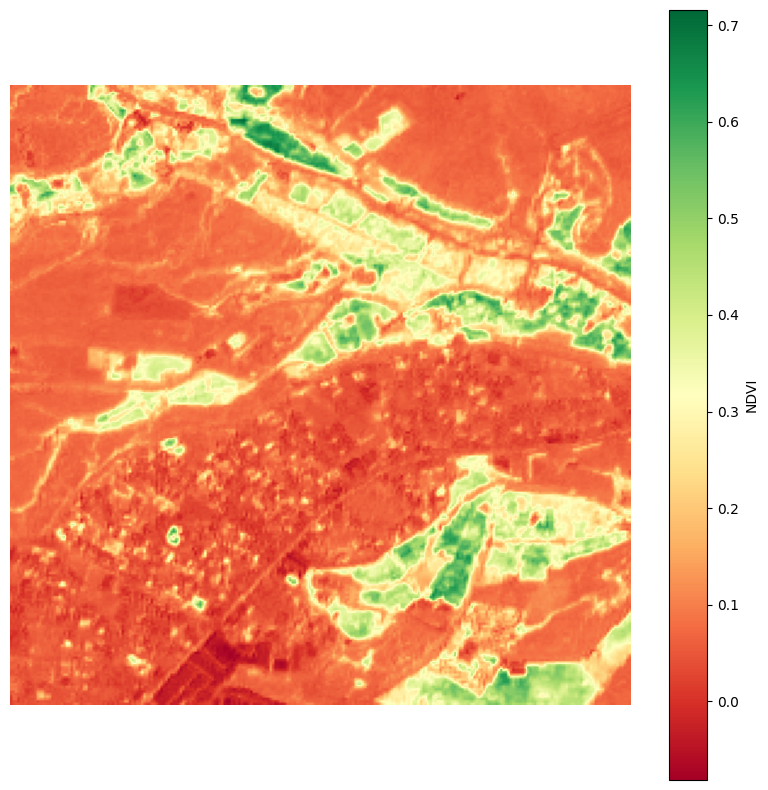

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal

# Open the red band data
data_red = "G:\\My Drive\\RUH_One_sub-4\\sub_image_294.tif"
red_ds = gdal.Open(data_red)

# Open the NIR band data
data_nir = "G:\\My Drive\\RUH_One_sub-8\\sub_image_294.tif"
nir_ds = gdal.Open(data_nir)

# Read bands and convert to float32 for calculation
red = red_ds.GetRasterBand(1).ReadAsArray().astype(np.float32)
nir = nir_ds.GetRasterBand(1).ReadAsArray().astype(np.float32)

# Calculate NDVI
ndvi = (nir - red) / (nir + red)

# Plot NDVI
plt.figure(figsize=(10, 10))
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI')
plt.axis('off')  # Turn off the axis
plt.show()
